# Model Utilization
使用之前通过keras生成的模型进行数据集的分析，并提取信息

In [3]:
from keras.models import load_model
import numpy as np
import pandas as pd
import jieba
import gensim, logging
from gensim.models import word2vec
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import f1_score
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# load model
MLPmodel = load_model("outputs/MLPmodel.h5")
LSTMmodel = load_model("outputs/LSTMmodel.h5")

In [31]:
def score(model,text):
    def getWordVecs(wordList):
        W2Vmodel = word2vec.Word2Vec.load("W2Vmodel\CommentsW2V.model")
        vecs = []
        for word in wordList:
            word = word.replace("\n","")
            try:
                vecs.append(W2Vmodel[word])
            except KeyError:
                continue
        return np.array(vecs,dtype="float")
    try:
        seg_list = jieba.cut(text,cut_all=False)
        w2vTest = getWordVecs(list(seg_list))
        shapedVector = sum(np.array(w2cTest))/len(w2cTest)
        seg_list = jieba.cut(text, cut_all=False)
        w2cTest = getWordVecs(list(seg_list))
        shapedVector = sum(np.array(w2cTest))/len(w2cTest)
        return float(model.predict(np.array([shapedVector]))[0][0][0])
    except Exception as err:
        seg_list = jieba.cut(text, cut_all=False)
        w2cTest = getWordVecs(list(seg_list))
        shapedVector = sum(np.array(w2cTest))/len(w2cTest)
        shapedVector = np.array([shapedVector])
        reshapedVector = np.reshape(shapedVector,(shapedVector.shape[0],1,shapedVector.shape[1]))
        return float(model.predict(reshapedVector)[0][0])

def score2(text):
    return (score(MLPmodel,text)+score(LSTMmodel,text))/2

score ：模型，文本 =》评分<br>
score2 ：文本 =》MLP和LSTM模型的平均评分

In [32]:
score(MLPmodel, "非常喜欢")

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0.757239818572998

In [33]:
score2("我很喜欢看，真好看")

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0.8049248158931732

In [34]:
score(LSTMmodel,"好看")

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0.12131130695343018

In [35]:
score2("好看")

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0.5071258544921875

## 小结：
经过分析，LSTM模型出现了一个小问题，就是，当句子很短的时候，判断的准确性不高。<br>
用score2效果会好一点点

In [38]:
data = pd.read_csv("dataset\MovieComments1.csv",
                   encoding="gb18030",header=None,
                   names=["MovieName","comment","score","user","datatime","votes","UserUrl","CommentUrl"])
data.head()

,MovieName,comment,score,user,datatime,votes,UserUrl,CommentUrl
0,马戏之王 短评,故事講得不怎麽樣，依舊把少數人群當作噱頭的感覺；但忍不住抖腿。又唱又跳的休叔加上又唱又跳的...,推荐,Bosie,2017-12-28 00:31:54,34,https://www.douban.com/people/jeskovampire/,https://movie.douban.com/subject/3914513/comme...
1,马戏之王 短评,娱乐电影的本质还是视觉奇观和欢乐。,推荐,张小北,2018-02-04 17:36:08,37,https://www.douban.com/people/xzfd/,https://movie.douban.com/subject/3914513/comme...
2,马戏之王 短评,非常享受，作为串联歌舞的情节竟然也也颇有可看之处，倒是有点超出预期。酒吧的两场最好，高空飞...,推荐,艾小柯,2018-02-17 21:04:16,16,https://www.douban.com/people/aixiaoke/,https://movie.douban.com/subject/3914513/comme...
3,马戏之王 短评,3.5。1.这个马戏团，居然没有小丑，不开心！2.歌舞场面自然是最大看点，设计上花了不少心...,推荐,陆支羽,2018-02-05 14:30:58,15,https://www.douban.com/people/luzhiyu/,https://movie.douban.com/subject/3914513/comme...
4,马戏之王 短评,歌舞部分很燃，休叔一跳起舞来真的是帅啊！但抛开歌舞部分不谈，剧本就是个屌丝逆袭的故事，底层...,推荐,我要加油,2018-02-04 00:08:31,83,https://www.douban.com/people/172453309/,https://movie.douban.com/subject/3914513/comme...


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MovieName   12222 non-null  object
 1   comment     12222 non-null  object
 2   score       12222 non-null  object
 3   user        12222 non-null  object
 4   datatime    12222 non-null  object
 5   votes       12222 non-null  int64 
 6   UserUrl     12222 non-null  object
 7   CommentUrl  12222 non-null  object
dtypes: int64(1), object(7)
memory usage: 764.0+ KB


### 以用户为目标的系列短评分析
首先需要提取出发表过评论多于20个的用户，他们的评论才是有效的。

In [40]:
data['user'].value_counts()[lambda x: x > 20].head(10)

康报虹         46
痞影人科莱昂      39
西楼尘         36
陆支羽         33
王大根         32
徐若风         31
同志亦凡人中文站    31
方枪枪         30
Panda的阴影    30
桃桃淘电影       30
Name: user, dtype: int64

提取名字为XX的评论和打分的dataframe，对每条评论判断情感值, 最后给出一个总的用户情感倾向，并绘制时间情感图

In [42]:
username = '王大根'
icomment = data[data['user']==username][['comment', 'score', 'datatime']]
# 按时间序列排序
icomment = icomment.sort_values(by=['datatime'])

In [44]:
score_list = []
count = 0
for i in range(0,len(icomment)):
    iscore = score2(icomment.iloc[i]['comment'])
    score_list.append(iscore)
    count += 1
    if count < 6:
        print('comment:\n' + icomment.iloc[i]['comment'])
        print('True score:' + icomment.iloc[i]['score'])
        print('Forecast score:\n' + str(iscore))
        print()

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:
 比《寄生兽》差太多了，最崩溃的是以为终于看了一部避开福士苍汰的漫改，结果出来一个铃木伸之比福士苍汰还福士苍汰……
True score:较差
Forecast score:
0.8217411041259766



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:
 Ryan Reynold演龟毛丧逼比演死侍好笑！不过总感觉抢了Paul Rudd饭碗
True score:推荐
Forecast score:
0.8219002783298492



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:
 比《鲛珠传》还《银河护卫队》啊，很可能是目前最具太空科幻感的国产电影了！
True score:推荐
Forecast score:
0.8511591851711273



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:
 太可爱了，超能男子高中生的日常
True score:推荐
Forecast score:
0.784684032201767



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:
 要在一部青春片里看见李鸿其应该都不会多看两眼，在这片里一衬托，妈呀看完火速下载他之前演的同志电影了！
True score:还行
Forecast score:
0.8712604343891144



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

In [45]:
# 将汉字转化为0-1之间的小数
rating_convert = {'力荐':0.9, '推荐':0.7, '还行':0.5, '较差':0.3, '很差':0.1} 
converted_rating = list(map(lambda x: rating_convert[x], icomment['score']))

In [46]:
xs = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S').date() for d in icomment['datatime']]

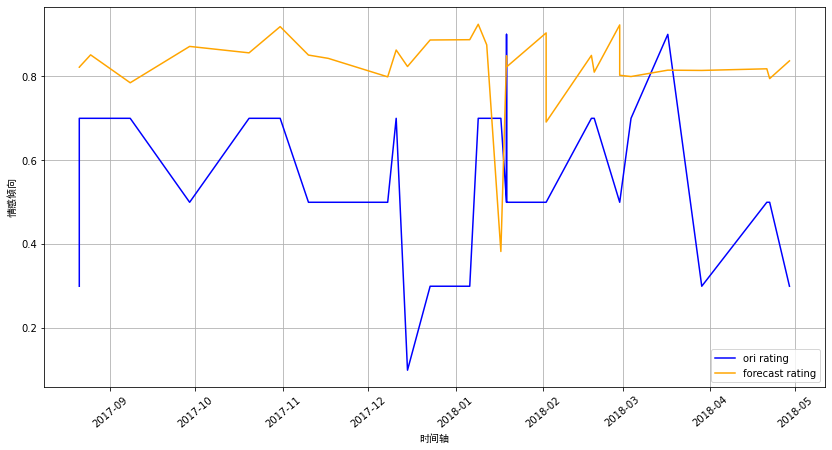

In [48]:
plt.figure(figsize=(14,7))
plt.plot(xs, pd.Series(converted_rating),label = 'ori rating', color='blue')
plt.plot(xs, score_list, label='forecast rating', color='orange')

plt.ylabel(u'情感倾向',fontproperties='SimHei')
plt.xlabel(u'时间轴',fontproperties='SimHei')
plt.xticks(rotation=40)
plt.legend(loc = 'lower right') 
plt.grid(True)
plt.show()

### 以电影为目标的系列短评分析
首先查看有哪些电影评论数较多，选取前10个查看

In [49]:
data['MovieName'].value_counts()[lambda x: x > 20].head(10)

啊，荒野 前篇 短评       166
我能说 短评           160
追捕 短评            160
马斯顿教授与神奇女侠 短评    160
茉莉牌局 短评          160
大坏狐狸的故事 短评       160
猫与桃花源 短评         160
荒城纪 短评           160
海滩的一天 短评         145
奇迹男孩 短评          140
Name: MovieName, dtype: int64

In [50]:
moviename='海滩的一天 短评'
imovie = data[data['MovieName']==moviename][['comment', 'score', 'datatime']]
# 按时间序列排序
imovie = imovie.sort_values(by=['datatime'])

In [52]:
score_list = []
count = 0
for i in range(0,len(imovie)):
    iscore = score2(imovie.iloc[i]['comment'])
    score_list.append(iscore)
    count += 1
    if count < 6:
        print('comment:\n' + imovie.iloc[i]['comment'])
        print('True score:' + imovie.iloc[i]['score'])
        print('Forecast score:\n' + str(iscore))
        print()

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:
 刻意了一點　／2015：記得看完挺疲憊，閱歷不足非最佳觀影時機，或許重看會更喜歡。
True score:还行
Forecast score:
0.9201954901218414



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:

True score:推荐
Forecast score:
0.9016426205635071



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:
 两个女人的对话
True score:还行
Forecast score:
0.9073964357376099



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:
 2018.1.15修复版。冗长的，说教的。
True score:还行
Forecast score:
0.8239744901657104



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


comment:
 叙事结构的创新，故事中的故事，多重时间线条。女性的爱情、婚姻、独立，现实的逼仄、压抑、苦闷。粗糙的画面效果，精致的故事结构，“罗生门”、意识流，大家风范。女性的成长。
True score:推荐
Forecast score:
0.866996705532074



D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\app\anaconda\envs\pls\lib\s

D:\app\anaconda\envs\pls\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [53]:
print("movie:" + moviename)
print("avg_score:" + str(sum(score_list)/len(score_list)))

movie:海滩的一天 短评
avg_score:0.8262554160479841


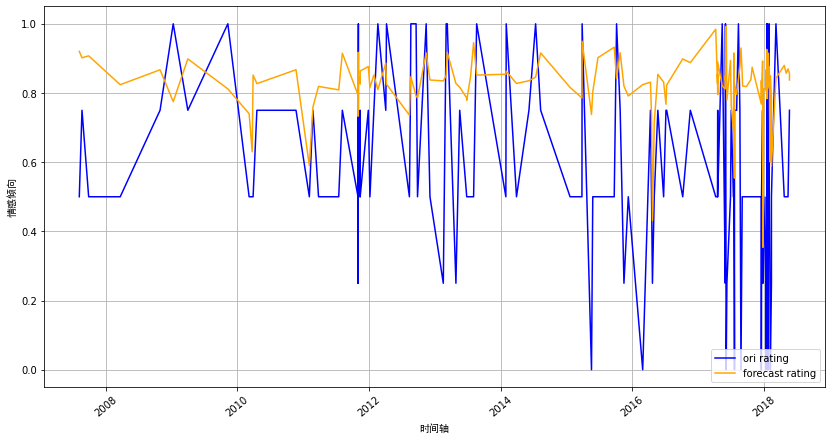

In [54]:
# 将汉字转化为0-1之间的小数
rating_convert = {'力荐':1.0, '推荐':0.75, '还行':0.5, '较差':0.25, '很差':0.0} 
converted_rating = list(map(lambda x: rating_convert[x], imovie['score']))

xs = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S').date() for d in imovie['datatime']]
plt.figure(figsize=(14,7))
plt.plot(xs, pd.Series(converted_rating),label = 'ori rating', color='blue')
plt.plot(xs, score_list, label='forecast rating', color='orange')

plt.ylabel(u'情感倾向',fontproperties='SimHei')
plt.xlabel(u'时间轴',fontproperties='SimHei')
plt.xticks(rotation=40)
plt.legend(loc = 'lower right') 
plt.grid(True)
plt.show()